# 練習
Contouring shapes
In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!

show_image_contour(image, contours) is a preloaded function that displays the image with all contours found using Matplotlib.

Shape of a horse in black and white
Remember you can use the find_contours() function from the measure module, by passing the thresholded image and a constant value.

![image.png](attachment:image.png)

In [ ]:
# 準備事項

%matplotlib inline
import matplotlib.pyplot as plt
def show_image(image, title='Image', cmap_type='gray', interpolation=None):
    plt.imshow(image, cmap=cmap_type)    
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def plot_comparision(original, filtered, title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(32,8), sharex=True, sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(title_filtered)
    ax2.axis('off')

def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color='red', marker='^')
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

# Import the data and the module needed for contouring detection.
# Obtain the horse image shown in the context area.
# Find the contours of the horse image using a constant level value of 0.8.

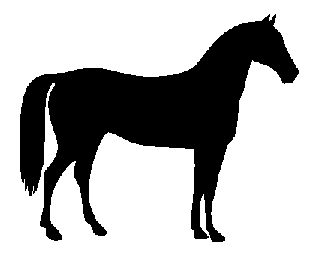

In [ ]:
%matplotlib inline
from skimage import data, io
io.imshow(data.horse().astype('float32'))
plt.axis('off')
plt.show()

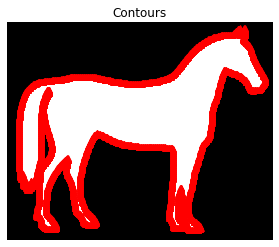

In [ ]:
# Import the modules
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, 0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

In [ ]:
[c.shape for c in contours]

[(2645, 2), (15, 2)]

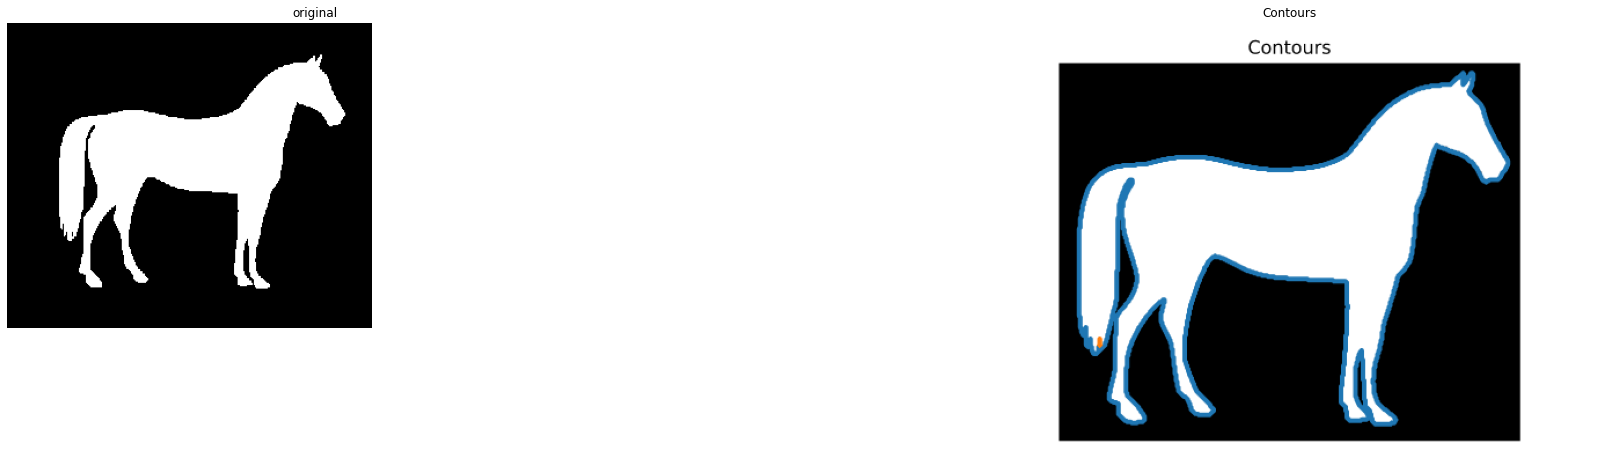

In [ ]:
# 預期結果

original, Contours = plt.imread('Horse.png'), \
                     plt.imread('Contours Horse.png')

plot_comparision(original, Contours, 'Contours')

# 練習
Find contours of an image that is not binary
Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dices loaded as image_dices and determine what number was rolled for each dice.

Purple dices
In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

color, measure and filters modules are already imported so you can use the functions to find contours and apply thresholding.

We also import io module to load the image_dices from local memory, using imread. Read more here.

![image.png](attachment:image.png)

(120, 120, 4)


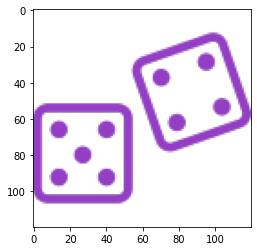

In [ ]:
# 準備事項
from skimage import color, measure
from skimage.filters import threshold_otsu

import ast
import numpy as np
import matplotlib.pyplot as plt

with open('image_dices.txt') as f:
    image_dices = np.array(ast.literal_eval(f.read()), dtype='uint8')[:, :, :]
    # [:, :, :3] # 第一種方式 去除 RGBA的 A 部分

print(image_dices.shape)
plt.imshow(image_dices)
plt.show()
# Transform the image to grayscale using rgb2gray().
# Obtain the optimal threshold value for the image and set it as thresh.
# Apply thresholding to the image once you have the optimal threshold value thresh, using the corresponding operator.
# Apply the corresponding function to obtain the contours and use a value level of 0.8.

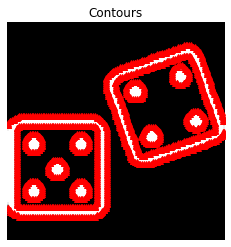

In [ ]:
# Make the image grayscale
# 第二種方式 color.rgba2rgb
image_dices = color.rgb2gray(color.rgba2rgb(image_dices))
# rgb2gray(rgba2rgb(rgb))
# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary, 0.8)

# Show the image
show_image_contour(image_dices, contours)

In [ ]:
# 預期結果

original, Dice = plt.imread('Dice.png'), \
                     plt.imread('Contours Dice.png')

plot_comparision(original, Dice, 'Dice')

# 練習
Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

3 images showing the steps to find contours

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

The contours found in the previous exercise are preloaded as contours.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

show_image_contour(image, contours) is a preloaded function that displays the image with all contours found using Matplotlib.

![image.png](attachment:image.png)

In [ ]:
# 準備事項
import ast
import numpy as np
import matplotlib.pyplot as plt

with open('contours.txt') as f:
    contours = ast.literal_eval(f.read())

contours = [np.array(i) for i in contours]
print(len(contours))
contours
# Make shape_contours be a list with all contour shapes of contours.
# Set max_dots_shape to 50.
# Set the shape condition of the contours to be the maximum shape size of the dots max_dots_shape.
# Print the dice's number.

13


[array([[ 61.2, 119. ],
        [ 62. , 118.2],
        [ 62.2, 118. ],
        [ 63. , 117.2],
        [ 63.2, 117. ],
        [ 64. , 116.2],
        [ 64.2, 116. ],
        [ 65. , 115.2],
        [ 65.2, 115. ],
        [ 65.2, 114. ],
        [ 65.2, 113. ],
        [ 66. , 112.2],
        [ 66.2, 112. ],
        [ 66.2, 111. ],
        [ 66.2, 110. ],
        [ 67. , 109.2],
        [ 67.2, 109. ],
        [ 67.2, 108. ],
        [ 67.2, 107. ],
        [ 68. , 106.2],
        [ 68.2, 106. ],
        [ 68.2, 105. ],
        [ 68.2, 104. ],
        [ 69. , 103.2],
        [ 69.2, 103. ],
        [ 69.2, 102. ],
        [ 70. , 101.2],
        [ 70.2, 101. ],
        [ 70.2, 100. ],
        [ 70.2,  99. ],
        [ 71. ,  98.2],
        [ 71.2,  98. ],
        [ 71.2,  97. ],
        [ 71.2,  96. ],
        [ 72. ,  95.2],
        [ 72.2,  95. ],
        [ 72.2,  94. ],
        [ 72.2,  93. ],
        [ 73. ,  92.2],
        [ 73.2,  92. ],
        [ 73.2,  91. ],
        [ 73.2, 

In [ ]:
def show_image_contour_by_max(image, contours, upper):
    plt.figure()
    for n, contour in enumerate(contours):
        if upper > contour.shape[0] :
            plt.plot(contour[:, 1], contour[:, 0], linewidth=1, color='blue', marker='^')
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

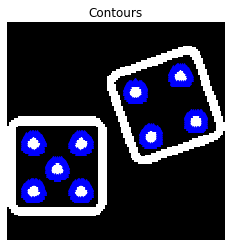

Dice's dots number: 9. 


In [ ]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found 
show_image_contour_by_max(binary, contours, max_dots_shape)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))

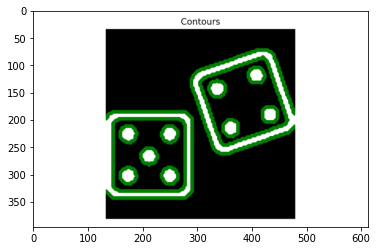

In [ ]:
# 預期結果
plt.imshow(plt.imread('Contours - dice - number.png'))
plt.show()